# 1. Линейная регрессия

In [63]:
# Импорт библиотек
import numpy as np
import pandas as pd
#import random
import matplotlib.pyplot as plt
%matplotlib inline

Сгенерируем данные

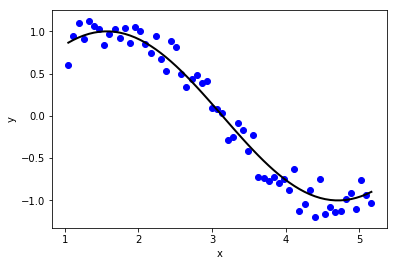

In [64]:
np.random.seed(100)
x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
y_pred = np.sin(x)
x = x.reshape(-1,1)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Попробуем оценить параметры модели $y = \beta_0 + \beta_1*x$.

beta_0: 2.0086
beta_1: -0.6463
Среднеквадратичная ошибка: 0.0618
Доля объясненной дисперсии: 0.9081


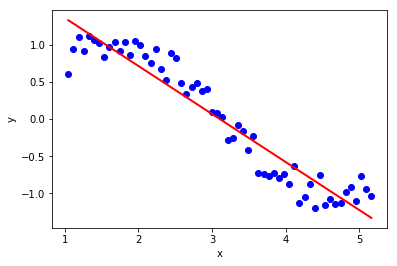

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

lr_power1 = LinearRegression()
lr_power1.fit(x,y)
pred_1 = lr_power1.predict(x)

print('beta_0: %.4f' % lr_power1.intercept_)
print('beta_1: %.4f' % lr_power1.coef_[0])
print('Среднеквадратичная ошибка: %.4f' % mean_squared_error(y, pred_1))
print('Доля объясненной дисперсии: %.4f' % explained_variance_score(y, pred_1))

plt.scatter(x,y, color='blue')
plt.plot(x, pred_1, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Рассмотрим полиномиальные модели. Это, по-прежнему, линейные модели, где в качестве признаков выстпают степени $x$.

In [66]:
X = x
for i in range(2,16):
    X = np.hstack((X, x**i))
print(X[:5, :])

[[  1.04719755   1.09662271   1.14838062   1.20258137   1.25934027
    1.31877804   1.38102114   1.44620195   1.51445914   1.58593791
    1.66079029   1.73917553   1.82126035   1.90721938   1.99723547]
 [  1.11701072   1.24771295   1.39370874   1.55678761   1.73894845
    1.94242406   2.1697085    2.42358766   2.7071734    3.02394171
    3.37777531   3.77301124   4.21449401   4.70763499   5.25847875]
 [  1.18682389   1.40855095   1.67170192   1.98401578   2.35467732
    2.7945873    3.31668298   3.9363186    4.67171696   5.5445053
    6.58035136   7.8097182    9.26876015  11.00038599  13.0555209 ]
 [  1.25663706   1.5791367    1.98440171   2.49367273   3.13364157
    3.93785014   4.94844842   6.21840369   7.81427654   9.8197095
   12.33981089  15.5066637   19.48624831  24.48714181  30.77144993]
 [  1.32645023   1.75947022   2.33384968   3.09573544   4.106339
    5.44685431   7.22498116   9.58357794  12.71213917  16.86201995
   22.36663026  29.66822189  39.35341979  52.2003528   69.2411

Рассмотрим модели разных степеней.

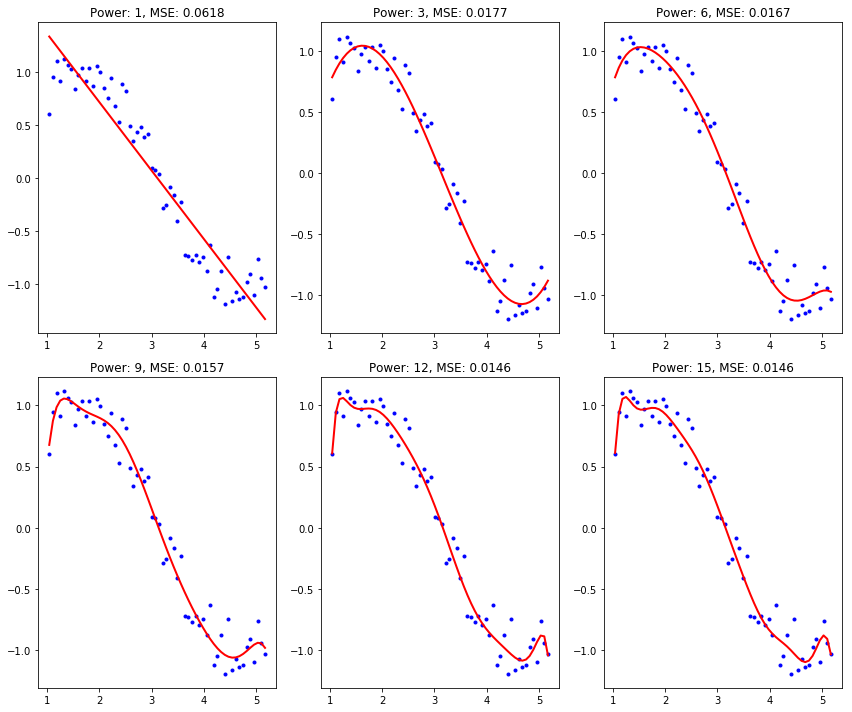

In [68]:
# Создадим DataFrame для результатов
col = ['mse', 'evs', 'intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['model_pow^%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

# Определим степени моделей, для которых нарисуем графики (1, 3, 6, 9, 12, 15)
# и положение соответствующего графика на картинке
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

linreg = LinearRegression(normalize=True) # Приводим данные к единичной норме

plt.figure(figsize=(12,10))
# Пройедм по всем степеням от 1 до 15 и оценим резальтаты
for power in range(1,16):
    # обучаем модель и делаем предсказание
    linreg.fit(X[:, :power], y)
    y_pred = linreg.predict(X[:, :power])
    
     # вычисляем ошибку
    mse = mean_squared_error(y, y_pred)
    evs = explained_variance_score(y, y_pred)
    
    # проверяем, требуется ли нарисовать график модели степени power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(x, y,'.b')
        plt.plot(x, y_pred, 'red')
        plt.title(('Power: %d, MSE: %.4f' % (power, mse)))
    
    # Возвращаем параметры модели
    ret = [mse, evs, linreg.intercept_]
    ret.extend(linreg.coef_)
    coef_matrix_simple.iloc[power-1, :power+3] = ret

Среднеквадратичная ошибка убывает с ростом степени, но при переходе от степени 1 к степени 3 она убывает сильно, а при переходе от степени 12 к степени 15 (практически) не меняется.

Взглянем на результаты моделирования.

In [69]:
coef_matrix_simple

,mse,evs,intercept,coef_x^1,coef_x^2,coef_x^3,coef_x^4,coef_x^5,coef_x^6,coef_x^7,coef_x^8,coef_x^9,coef_x^10,coef_x^11,coef_x^12,coef_x^13,coef_x^14,coef_x^15
model_pow^1,0.0617657,0.908146,2.00865,-0.646345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^2,0.0612557,0.908904,1.86713,-0.538981,-0.0172796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^3,0.0176942,0.973686,-1.41704,3.42441,-1.42051,0.15056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^4,0.0176391,0.973768,-1.11936,2.93328,-1.14519,0.0873827,0.005084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^5,0.017328,0.974231,0.697188,-0.861703,1.78629,-0.968282,0.184004,-0.0115184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^6,0.0166834,0.975189,-6.05131,16.1864,-15.0327,7.36638,-2.01728,0.284085,-0.0158585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^7,0.0163366,0.975705,-18.8772,54.1754,-60.6814,36.297,-12.5024,2.46658,-0.258479,0.0111566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^8,0.015651,0.976725,-65.7688,213.445,-286.379,210.906,-93.3783,25.5032,-4.21177,0.38603,-0.0150833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^9,0.0156501,0.976726,-70.3149,230.857,-314.807,236.904,-108.082,30.8489,-5.46405,0.568752,-0.0301883,0.000540233,NaN,NaN,NaN,NaN,NaN,NaN
model_pow^10,0.0146456,0.97822,-458.617,1886.13,-3373.86,3467.25,-2269.54,989.968,-291.832,57.4867,-7.25149,0.529632,-0.0170307,NaN,NaN,NaN,NaN,NaN


С ростом сложности модели сильно растут значения коэффициентов. Т.е. признаки начинают сильно влиять на значение предсказания, что приводит к переобученности моделей.

Причины переобученности линейных моделей:
1. Включение в модель нерелевантных признаков;
2. Сильно коррелирующие признаки;
3. Большие по модулю значения коэффициентов модели.

Регуляризация помогает бороться с последним.

# 2. Регуляризация

Проверим, что происходит, если обучить модель степени 15 с резуляризацией. Рассмотрим ва вида регуляризации: Ridge и Lasso.

### Ridge

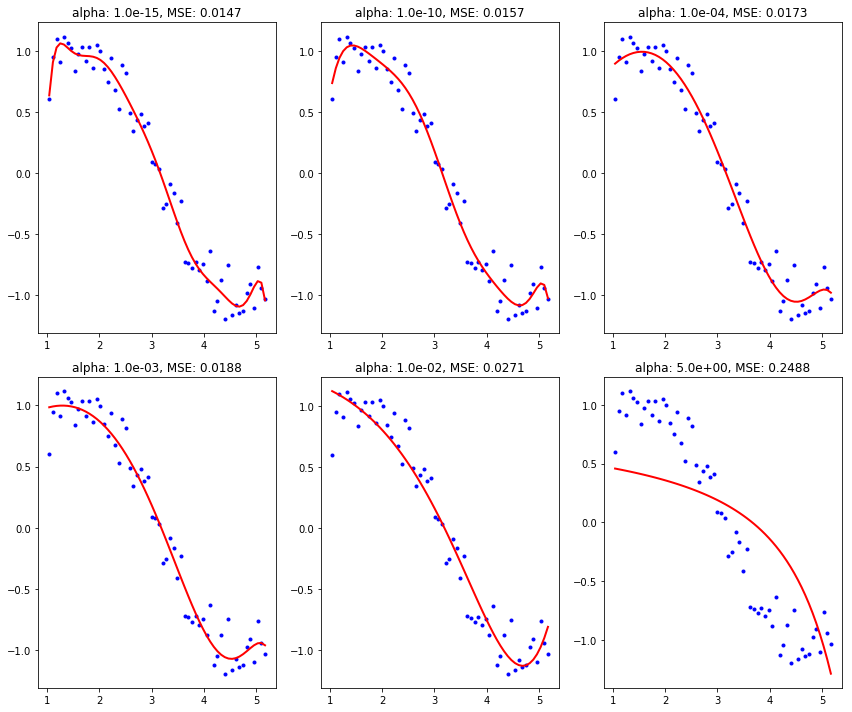

In [70]:
from sklearn.linear_model import Ridge

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] # значения параметров регуляризации

col = ['mse', 'evs', 'intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

plt.figure(figsize=(12,10))

for i in range(10): # пройдем по все заданным значениям регуляризации
    alpha = alpha_ridge[i]
    # обучаем модель и делаем предсказание
    ridgereg = Ridge(alpha, normalize=True)
    ridgereg.fit(X, y)
    y_pred = ridgereg.predict(X)
    
     # вычисляем ошибку
    mse = mean_squared_error(y, y_pred)
    evs = explained_variance_score(y, y_pred)
    
    # проверяем, требуется ли нарисовать график модели с параметром регуляризации alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(x, y,'.b')
        plt.plot(x, y_pred, 'red')
        plt.title(('alpha: %.1e, MSE: %.4f' % (alpha, mse)))
    
    # Возвращаем параметры модели
    ret = [mse, evs, ridgereg.intercept_]
    ret.extend(ridgereg.coef_)
    coef_matrix_ridge.iloc[i, :] = ret

С ростом коэффициента регуляризации (с увеличением влияния регуляризации) сложность модели убывает и ошбика увеличивается.
Посмотрим на матрицу коэффициентов.

In [71]:
coef_matrix_ridge

,mse,evs,intercept,coef_x^1,coef_x^2,coef_x^3,coef_x^4,coef_x^5,coef_x^6,coef_x^7,coef_x^8,coef_x^9,coef_x^10,coef_x^11,coef_x^12,coef_x^13,coef_x^14,coef_x^15
alpha_1e-15,0.0147128,0.97812,-229.568,835.427,-1266.51,1032.95,-476.578,111.895,-4.0251,-3.8396,0.506695,0.0838942,-0.0129601,-0.00229828,4.93308e-05,0.000156106,-2.48204e-05,1.16446e-06
alpha_1e-10,0.0157102,0.976637,-13.5089,33.8344,-29.359,11.1068,-1.25693,-0.213906,0.01906,0.00751848,0.000709373,-7.16269e-05,-4.02655e-05,-7.95902e-06,-3.8469e-07,3.12952e-07,9.57571e-08,-1.54015e-08
alpha_1e-08,0.0165066,0.975452,-3.11511,8.05592,-5.77146,1.72808,-0.0843946,-0.0516624,-0.00120164,0.00161666,0.000316737,2.67879e-06,-1.13762e-05,-2.628e-06,-1.21759e-07,9.02935e-08,2.36398e-08,-3.85008e-09
alpha_0.0001,0.0172593,0.974333,0.186103,0.941258,-0.21192,-0.0357421,-0.00251335,0.000246887,0.000124552,2.71308e-05,4.28148e-06,4.9375e-07,2.64558e-08,-5.86596e-09,-2.44453e-09,-5.41874e-10,-8.3343e-11,-6.18003e-12
alpha_0.001,0.018765,0.972094,0.689405,0.425183,-0.107945,-0.0236187,-0.00290222,-0.000153645,3.58525e-05,1.51009e-05,3.61568e-06,6.89278e-07,1.10026e-07,1.38427e-08,8.62142e-10,-2.29054e-10,-1.25585e-10,-4.04091e-11
alpha_0.01,0.0270789,0.95973,1.26282,-0.0610566,-0.0549064,-0.0108926,-0.00151154,-0.000139209,6.38968e-07,4.2117e-06,1.31252e-06,2.94526e-07,5.52212e-08,8.76949e-09,1.07742e-09,5.02506e-11,-2.66882e-11,-1.30676e-11
alpha_1,0.101952,0.848384,0.968453,-0.142742,-0.0199754,-0.00313577,-0.000488681,-7.36138e-05,-1.05388e-05,-1.39265e-06,-1.57823e-07,-1.1384e-08,1.07183e-09,7.66369e-10,2.43679e-10,6.34364e-11,1.50573e-11,3.38944e-12
alpha_5,0.248808,0.629988,0.534041,-0.0609515,-0.00887174,-0.00148371,-0.000252751,-4.2954e-05,-7.25416e-06,-1.21647e-06,-2.02442e-07,-3.33989e-08,-5.45304e-09,-8.7871e-10,-1.3918e-10,-2.15324e-11,-3.22033e-12,-4.57055e-13
alpha_10,0.324781,0.517006,0.380035,-0.0386543,-0.00576414,-0.000993786,-0.000175546,-3.11149e-05,-5.51383e-06,-9.76733e-07,-1.73028e-07,-3.06645e-08,-5.43803e-09,-9.65131e-10,-1.7143e-10,-3.04742e-11,-5.42125e-12,-9.65057e-13
alpha_20,0.410668,0.38928,0.250844,-0.0233711,-0.0035561,-0.000627797,-0.000113867,-2.07687e-05,-3.79415e-06,-6.93964e-07,-1.27112e-07,-2.33227e-08,-4.28736e-09,-7.8969e-10,-1.45742e-10,-2.69502e-11,-4.99306e-12,-9.26761e-13


Высокие значения $\alpha$ (больше 1) приводят к резкому росту ошибки, т.е. высокие значения коэффициента регуляризации делают модель "недоученной". Отметим, что коэффициенты не оращаются в 0.

In [72]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1) # ни одного нулевого значения

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

Посомтрим, как зависят коэффициенты регрессии от параметра регуляризации при отсутствии нормализации. Создадим функцию для отрисовки зависимости коэффициентов модели от параметра регуляризации, она нам понадобится не раз.

In [73]:
from cycler import cycler

def plot_reg(X, y, model=Ridge, min_power=-10, max_power=-2, n_alphas=200, coef_names=None, norm=False):
    # #############################################################################
    # Вычислим значения коэффициентов при разных значениях параметра регуляризации

    n_alphas = n_alphas
    alphas = np.logspace(min_power, max_power, n_alphas) # зададим логарифмическую шкалу для параметра регуляризации

    coefs = []
    for a in alphas:
        regr = model(alpha=a, normalize=norm)
        regr.fit(X, y)
        coefs.append(regr.coef_)

    # #############################################################################
    # Нарисуем график
    
    plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'k', 'm']) *
                           cycler('linestyle', ['-', '--', ':', '-.'])))

    fig, ax = plt.subplots(figsize=(8,5))

    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # обратная шкала
    plt.xlabel('alpha')
    plt.ylabel('coef')
    plt.axis('tight')
    if not (coef_names is None):
        plt.legend(coef_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

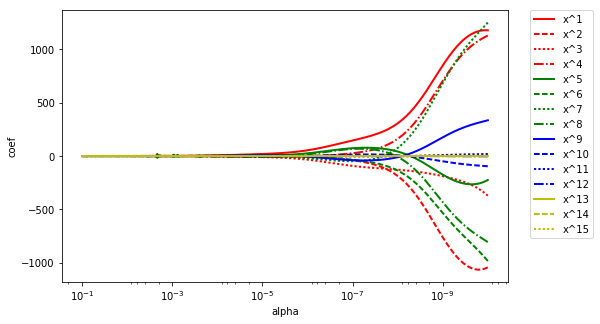

In [74]:
plot_reg(X, y, Ridge, min_power=-10, max_power=-1, coef_names=['x^%d'%i for i in range(1,X.shape[1]+1)])

Можно доверить выбор оптимального параметра slkearn.

Alpha: 1.23e-04
0.227737806623
[  8.94710647e-01  -2.00697451e-01  -3.47997968e-02  -2.62299557e-03
   1.99033306e-04   1.15858681e-04   2.62337292e-05   4.30249763e-06
   5.30529468e-07   3.73179628e-08  -3.68721070e-09  -2.13535405e-09
  -5.24958093e-10  -9.12882126e-11  -1.01672382e-11]
MSE: 0.0173
Доля объясненной дисперсии: 0.9742


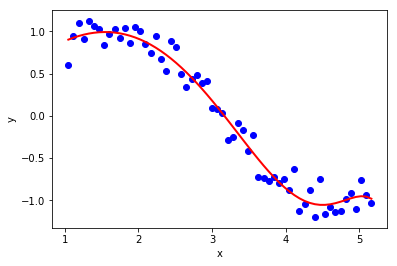

In [75]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-10, -1, num=100)
ridgeregCV = RidgeCV(alphas=alphas, normalize=True, store_cv_values=True)
ridgeregCV.fit(X, y)
print('Alpha: %.2e' % ridgeregCV.alpha_)
print(ridgeregCV.intercept_)
print(ridgeregCV.coef_)

pred_rcv = ridgeregCV.predict(X)

print('MSE: %.4f' % mean_squared_error(y, pred_rcv))
print('Доля объясненной дисперсии: %.4f' % explained_variance_score(y, pred_rcv))

plt.scatter(x, y, color='blue')
plt.plot(x, pred_rcv, 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [76]:
ridgeregCV.cv_values_.shape

(60L, 100L)

(0, 0.2)

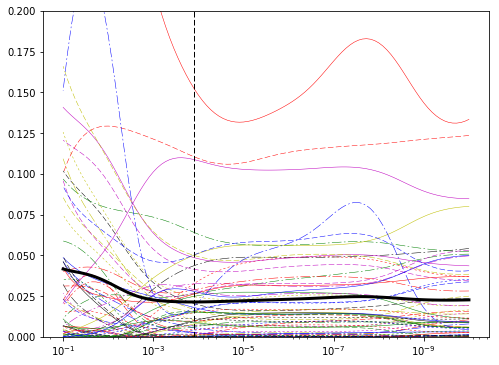

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(alphas, ridgeregCV.cv_values_.T, linewidth=0.5)
ax.plot(alphas, np.mean(ridgeregCV.cv_values_.T, axis=1), '-k', linewidth=3)
ax.plot([ridgeregCV.alpha_]*2, [0, 0.2], '--k', linewidth=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # обратная шкала
ax.set_ylim([0, 0.2])

### Lasso

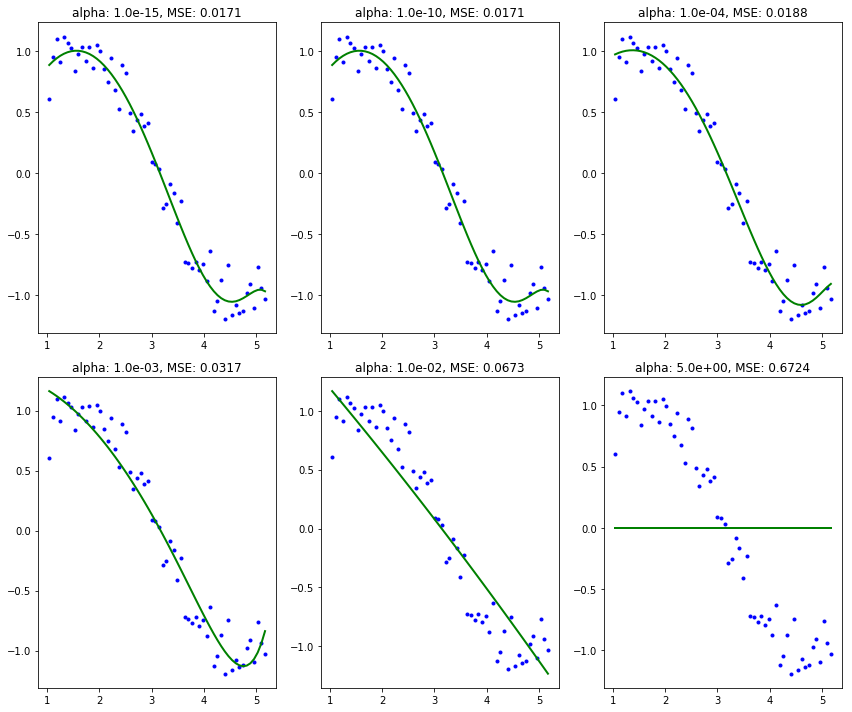

In [78]:
from sklearn.linear_model import Lasso

alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] # значения параметров регуляризации

col = ['mse', 'evs', 'intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

plt.figure(figsize=(12,10))

for i in range(10): # пройдем по все заданным значениям регуляризации
    alpha = alpha_ridge[i]
    # обучаем модель и делаем предсказание
    lassoreg = Lasso(alpha, normalize=True)
    lassoreg.fit(X, y)
    y_pred = lassoreg.predict(X)
    
     # вычисляем ошибку
    mse = mean_squared_error(y, y_pred)
    evs = explained_variance_score(y, y_pred)
    
    # проверяем, требуется ли нарисовать график модели c параметром регуляризации alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(x, y,'.b')
        plt.plot(x, y_pred, 'green')
        plt.title(('alpha: %.1e, MSE: %.4f' % (alpha, mse)))
    
    # Возвращаем параметры модели
    ret = [mse, evs, lassoreg.intercept_]
    ret.extend(lassoreg.coef_)
    coef_matrix_lasso.iloc[i, :] = ret

С ростом параметра регуляризации сложность модели также снижается. Более того, при $\alpha = 5$ мы получили константную оценку. Посомтрим, почему так произошло.

In [79]:
coef_matrix_lasso

,mse,evs,intercept,coef_x^1,coef_x^2,coef_x^3,coef_x^4,coef_x^5,coef_x^6,coef_x^7,coef_x^8,coef_x^9,coef_x^10,coef_x^11,coef_x^12,coef_x^13,coef_x^14,coef_x^15
alpha_1e-15,0.0171387,0.974512,-0.0262155,1.26812,-0.356685,-0.0233238,8.93522e-05,0.000397882,9.51814e-05,1.66677e-05,2.47187e-06,3.12955e-07,3.02597e-08,7.3894e-10,-6.84053e-10,-2.62769e-10,-7.11243e-11,-1.6895e-11
alpha_1e-10,0.0171387,0.974512,-0.026215,1.26812,-0.356685,-0.0233238,8.93515e-05,0.000397881,9.51814e-05,1.66677e-05,2.47187e-06,3.12955e-07,3.02596e-08,7.38928e-10,-6.8404e-10,-2.62769e-10,-7.11244e-11,-1.6895e-11
alpha_1e-08,0.0171387,0.974512,-0.0261668,1.26807,-0.356671,-0.0233235,8.92815e-05,0.000397799,9.51851e-05,1.6668e-05,2.47185e-06,3.1294e-07,3.0255e-08,7.37767e-10,-6.82721e-10,-2.62792e-10,-7.11334e-11,-1.6897e-11
alpha_0.0001,0.018764,0.972095,0.453373,0.762393,-0.233441,-0.0213584,-0,0,5.13784e-05,2.21908e-05,2.70228e-06,2.13096e-07,0,0,0,-0,-0,-2.42397e-11
alpha_0.001,0.0317414,0.952796,1.30561,-0,-0.130099,-0,-0,-0,0,0,0,0,0,6.30261e-09,2.4552e-09,0,0,0
alpha_0.01,0.067296,0.899922,1.71228,-0.508371,-0.0119026,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0,0
alpha_1,0.672433,0,0.000655744,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,0.672433,0,0.000655744,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,0.672433,0,0.000655744,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_20,0.672433,0,0.000655744,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


Коэффициенты имеют меньшие абсолютные значения, чем при Ridge регуляризации. Кроме того, Lasso регуляризация обнуляет коэффициенты, тем самым снижая размерность.

In [80]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_0.0001     7
alpha_0.001     12
alpha_0.01      13
alpha_1         16
alpha_5         16
alpha_10        16
alpha_20        16
dtype: int64

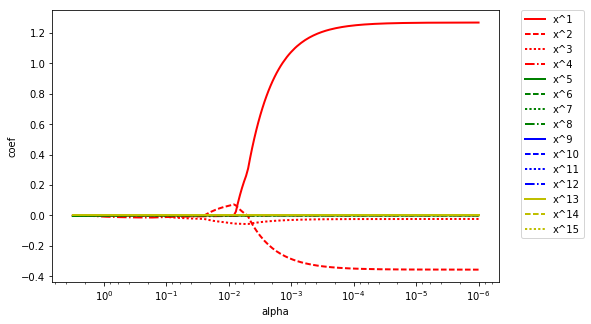

In [81]:
plot_reg(X, y, Lasso, min_power=-6, max_power=0.5, coef_names=['x^%d'%i for i in range(1,X.shape[1]+1)])

Выбор оптимального параметра.

Alpha: 1.52e-04
0.687524724524
[  5.21939902e-01  -1.76640089e-01  -2.10310155e-02  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.27809469e-05   2.94524076e-06
   1.84429281e-07   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -1.71617798e-11]
MSE: 0.0205
Доля объясненной дисперсии: 0.9695


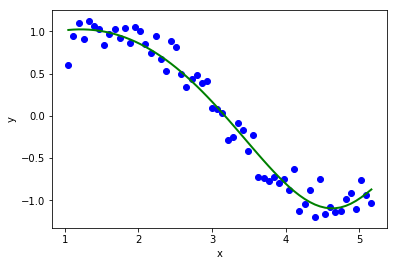

In [82]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-10, -1, num=100)
lassoregCV = LassoCV(alphas=alphas, normalize=True, cv=10)
lassoregCV.fit(X, y)
print('Alpha: %.2e' % lassoregCV.alpha_)
print(lassoregCV.intercept_)
print(lassoregCV.coef_)

pred_lcv = lassoregCV.predict(X)

print('MSE: %.4f' % mean_squared_error(y, pred_lcv))
print('Доля объясненной дисперсии: %.4f' % explained_variance_score(y, pred_lcv))

plt.scatter(x, y, color='blue')
plt.plot(x, pred_lcv, 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(0, 1.5)

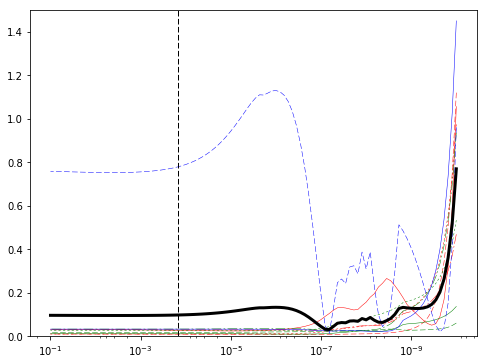

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(alphas, lassoregCV.mse_path_, linewidth=0.5)
ax.plot(alphas, np.mean(lassoregCV.mse_path_, axis=1), '-k', linewidth=3)
ax.plot([lassoregCV.alpha_]*2, [0, 1.5], '--k', linewidth=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # обратная шкала
ax.set_ylim([0,1.5])

# 3. Регрессионные деревья

MSE (max_depth=2): 0.0255
MSE (max_depth=5): 0.0050
Доля объясненной дисперсии (max_depth=2): 0.9620
Доля объясненной дисперсии (max_depth=5): 0.9926


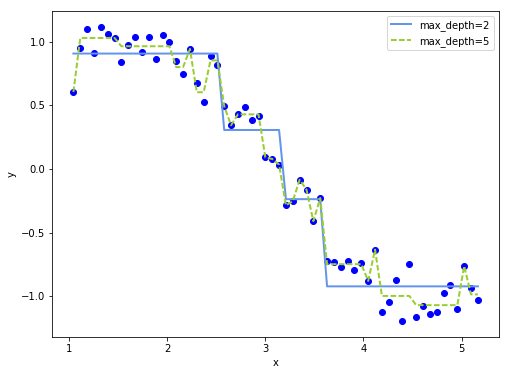

In [84]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(x,y)
regr_2.fit(x,y)

y_1 = regr_1.predict(x)
y_2 = regr_2.predict(x)

print('MSE (max_depth=2): %.4f' % mean_squared_error(y, y_1))
print('MSE (max_depth=5): %.4f' % mean_squared_error(y, y_2))
print('Доля объясненной дисперсии (max_depth=2): %.4f' % explained_variance_score(y, y_1))
print('Доля объясненной дисперсии (max_depth=5): %.4f' % explained_variance_score(y, y_2))

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue')
plt.plot(x, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Регрессионные деревья с увеличением глубины начинают переобучаться. Как и для деревьев классификации, можно выбрать оптимальные параметры на кросс-валидации.